<a href="https://colab.research.google.com/github/vforjj/AI-ML-Review/blob/main/Chapter07_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%9D%B4%EC%83%81%EA%B1%B0%EB%9E%98_%ED%83%90%EC%A7%80_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Chapter 07]**  
**┗ 신용카드 이상거래 탐지**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* Data Spec Check
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data Readiness Check」
* 🥈Session 2 - 「Modeling」
* 🥇Session 3 - 「Feature Engineering」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter07")
os.getcwd()

# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
대부분의 국가에서 신용카드 사용이 일반화되고 있다.
신용카드의 사용자들은 항상 분실에 대한 우려를 갖고 있고, 신용카드 회사들은 분실했을 경우, 사용하는 패턴이 달라지는 것을 감지하여 신용카드를 정지하는 프로세스를 갖고 있다.
데이터를 통해 이러한 패턴을 자동으로 감지할 수 있다면, 카드 오용으로 인한 피해를 미연에 방지할 수 있다.
카드 데이터를 활용하여 카드의 이상 거래 탐지를 찾을 수 있는 모델을 만들어보자.
```



In [ ]:
import pandas as pd

df = pd.read_csv('data/data.csv')

['{}: {}'.format(i, name) for (i, name) in enumerate(list(df.columns))]

> **데이터 살펴보기**

* 신용카드 사용에 대한 다양한 feature
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|Features|신용 카드 관련 정보|
|Class|이상거래여부|

In [ ]:
# 각 컬럼별로 값을 실제로 확인해본다.
df

In [ ]:
df.shape

# **Data Spec Check**
---
> **Data 가공 명세서**

<img src = "https://drive.google.com/uc?id=173ZGe9zrLUl7c2N0cSj_69LuN2BnGs3l">

In [ ]:
# 본 데이터는 feature에 대한 Description이 없기 때문에, Feature selection을 하기가 어려움
df.columns.tolist()

['class',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'log_amount']

In [ ]:
df.isnull().sum()

class         0
v1            0
v2            0
v3            0
v4            0
v5            0
v6            0
v7            0
v8            0
v9            0
v10           0
v11           0
v12           0
v13           0
v14           0
v15           0
v16           0
v17           0
v18           0
v19           0
v20           0
v21           0
v22           0
v23           0
v24           0
v25           0
v26           0
v27           0
v28           0
log_amount    0
dtype: int64

In [ ]:
df.groupby('class')['v1'].count()

class
0    284315
1       492
Name: v1, dtype: int64

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ Context) 요즘은 대부분의 사람들이 신용카드를 사용한다.
신용카드는 사용에 있어서는 높은 편의성을 제공하지만, 카드의 분실 혹은 도난으로 인한 비정상적인 거래(이상거래)가 발생할 수 있다.
▶ As-IS) 대부분의 금융기관에서는 특정 조건(시간, 장소 등)과 개인의 특성을 매핑하여 트리거를 만들어서 경보 시스템을 운영한다.
예를 들어, 60대의 신용카드가 새벽 2시에 사용되었다면 알람이 가는 시스템이다.
▶ To-BE) 위와 같은 조건으로 알림을 주는 것도 이상거래를 탐지할 수 있지만,
다양한 Feature를 활용하여 복합적인 상황에서의 이상거래를 탐지하기 위한 모델을 만들어서 운영하고자 한다.
▶ Goal) 수많은 신용카드 이용내역 중에 이상거래를 탐지할 수 있는 모델을 만들자.
이상거래의 경우 데이터가 매우 Imbalance 하기 때문에 오버샘플링을 진행해보도록 하자.
```  

> **기대효과**

```
▶ 이상거래를 탐지모델 개발을 통해 자동 탐지 기능 적용
▶ 이상거래를 통해 발생하는 고객의 피해 금액 감소
```

> **해결방안**

```
▶ Binary classification을 통해 이상거래 여부 분류
▶ Session 1 🥉
 - Data loading
 - Data Visualization
▶ Session 2 🥈
 - Modeling(Logistic regression, K-Nearest Neighbors, Random Forest)
▶ Session 3 🥇
 - Oversampling(using Numpy, imbalance-learn)
```

> **성과측정**  

```
▶ 이상거래 탐지율
```

> **현업적용**  

```
▶ 다양한 모델링 기법의 사용법 숙지
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Under sampling, 데이터 분할, 데이터 탐색
▶ Session 2 → Logistic Regression, K-nearest Neighbos, Random Forest
▶ Session 3 → Oversampling
```

# **🥉Session 1 - 「Data Readiness Check」**
---

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.concat([df['class'].value_counts(),
           df['class'].value_counts(normalize=True).round(5)], axis=1)

,class,class
0,284315,0.99827
1,492,0.00173


<a id="read_data"></a>

In [ ]:
y0_undersampled = df.loc[df['class'] == 0, :].sample(frac=0.05, replace=False, random_state=1)
y1_undersampled = df.loc[df['class'] == 1, :].sample(frac=0.05, replace=False, random_state=1)

In [ ]:
df_undersampled = pd.concat([y0_undersampled, y1_undersampled], axis=0)
df_undersampled

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,log_amount
106066,0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,1.031270,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,6.291571
102005,0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,-0.299226,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,1.930216
278450,0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.073391,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,2.995282
120218,0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.106821,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,2.879255
258527,0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.013126,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,3.197897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235634,1,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,...,0.452241,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,-0.273122
8845,1,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,3.414147
181966,1,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,...,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,3.688904
147605,1,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,-1.143646,...,-0.115922,0.015255,0.239994,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105,2.220398


In [ ]:
pd.concat([df_undersampled['class'].value_counts(),
           df_undersampled['class'].value_counts(normalize=True).round(5)], axis=1)

,class,class
0,14216,0.99824
1,25,0.00176


In [ ]:
neg, pos = np.bincount(df_undersampled['class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.3f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 14241
    Positive: 25 (0.176% of total)



In [ ]:
X = df_undersampled.iloc[:, 1:].values
y = df_undersampled['class'].values.astype(int)

y_labels = ['Not Fraud', 'Fraud']

print('Class labels:', np.unique(y), y_labels, [(i, val) for (i, val) in enumerate(np.bincount(y))])

Class labels: [0 1] ['Not Fraud', 'Fraud'] [(0, 14216), (1, 25)]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train

array([[-0.08269851,  0.94647664, -0.95405519, ..., -0.03486101,
         0.03945203,  4.21436214],
       [-1.32416099, -0.53624985,  0.84293343, ..., -0.03793072,
        -0.1785678 ,  5.43677846],
       [-0.73154399,  1.32884249,  1.29509562, ...,  0.0459347 ,
         0.1365257 ,  3.60307644],
       ...,
       [ 1.74604528, -1.62079938,  0.20883578, ...,  0.06399062,
         0.00804578,  5.11560173],
       [-3.81603381, -1.49266164, -1.46735804, ..., -0.63973237,
         0.02706764,  5.50338248],
       [-0.44796771,  1.02319169, -0.15177005, ..., -0.9975166 ,
        -0.55423174,  0.25541711]])

In [ ]:
print('Labels counts in y:',       np.bincount(y),
      [round(cnt / np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train),
      [round(cnt / np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Labels counts in y_test:',  np.bincount(y_test),
      [round(cnt / np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

Labels counts in y: [14216    25] [99.8, 0.2]
Labels counts in y_train: [9951   17] [99.8, 0.2]
Labels counts in y_test: [4265    8] [99.8, 0.2]


In [ ]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)),
                    columns=list(df.columns))

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
class,9968.0,0.00,0.04,0.00,0.00,0.00,0.00,1.00
v1,9968.0,-0.02,1.97,-30.82,-0.90,-0.01,1.30,2.45
v2,9968.0,-0.01,1.71,-35.62,-0.59,0.07,0.81,14.85
v3,9968.0,0.00,1.53,-27.75,-0.85,0.18,1.02,4.02
v4,9968.0,0.01,1.44,-4.84,-0.85,-0.01,0.77,11.19
v5,9968.0,-0.00,1.45,-28.36,-0.70,-0.05,0.61,22.71
v6,9968.0,-0.01,1.34,-13.36,-0.77,-0.29,0.39,17.02
v7,9968.0,0.01,1.31,-23.19,-0.54,0.05,0.59,30.90
v8,9968.0,-0.02,1.33,-37.35,-0.21,0.02,0.31,17.57
v9,9968.0,-0.00,1.09,-8.63,-0.64,-0.06,0.59,10.39


<Axes: xlabel='class'>

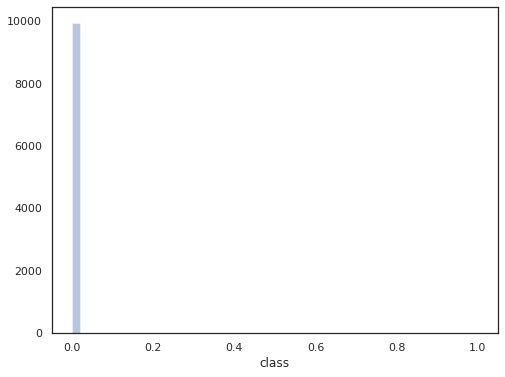

In [ ]:
plt.subplots(figsize=(8,6))
sns.distplot(data['class'], kde=False)

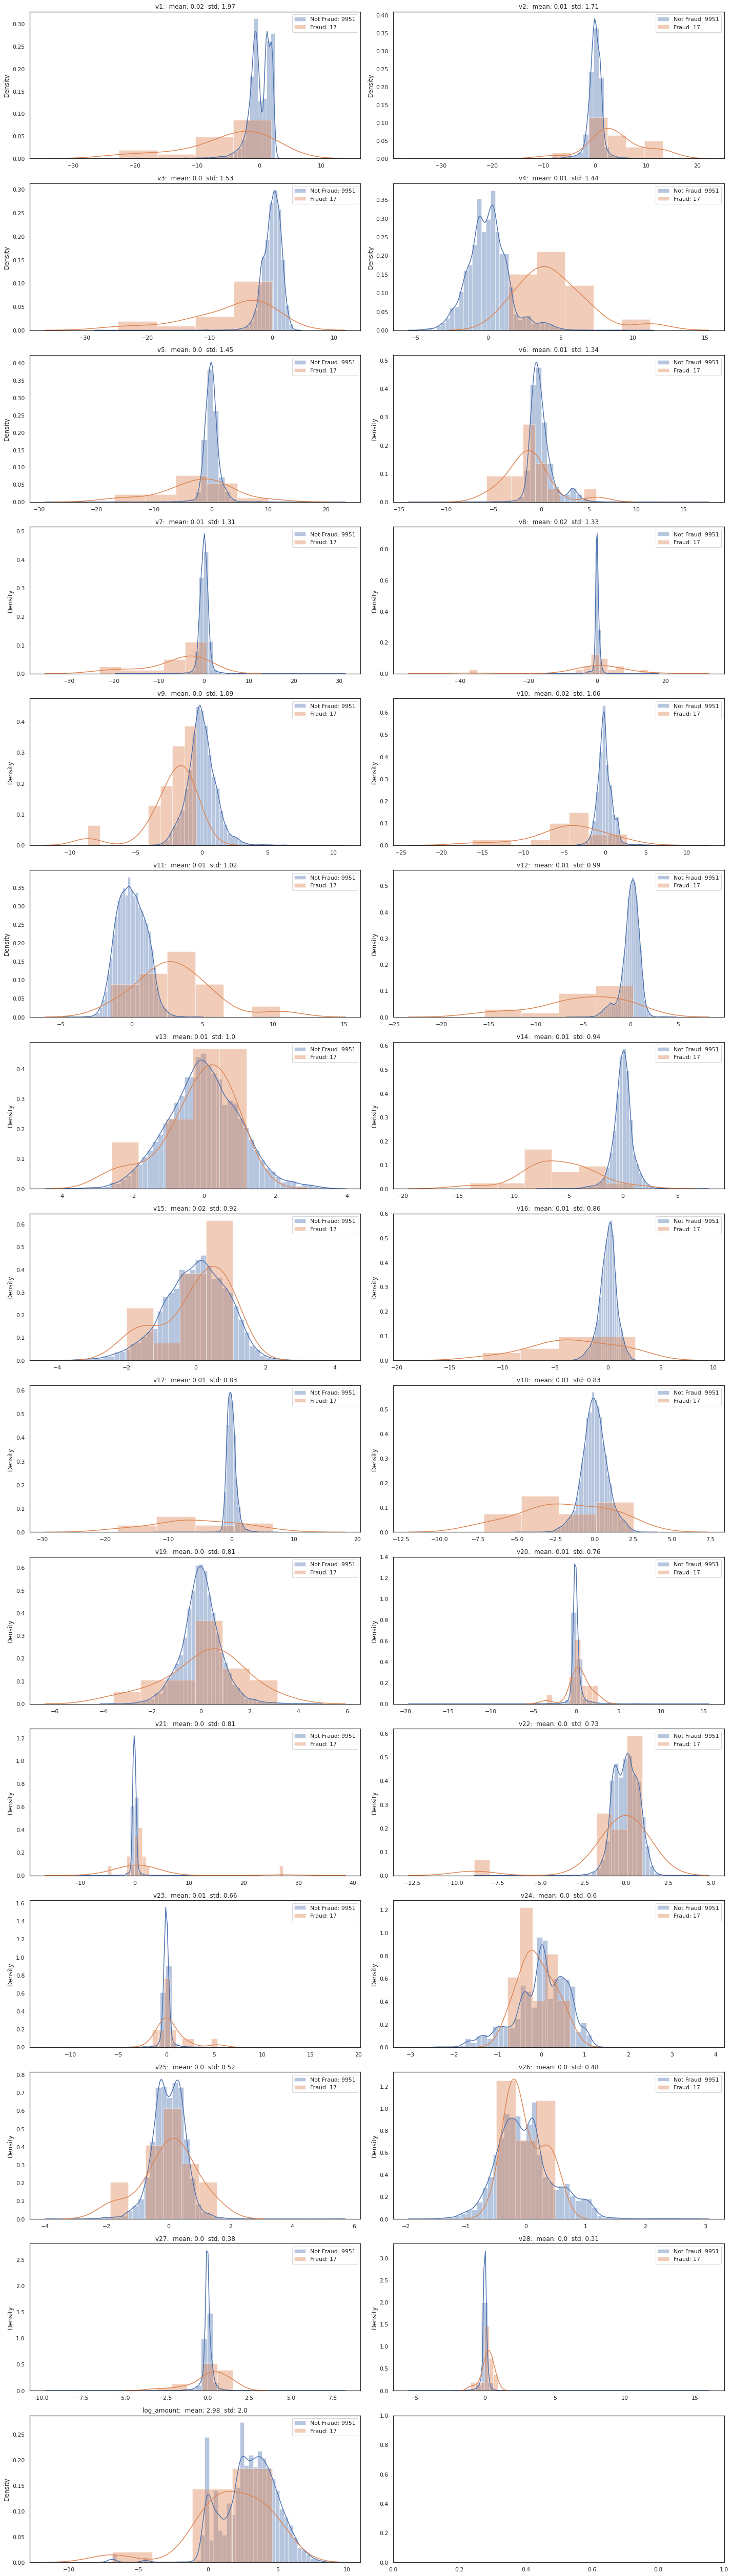

In [ ]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format('Not Fraud', len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format('Fraud',     len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(data.columns)[i+1], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout()

<a id="correlations"></a>

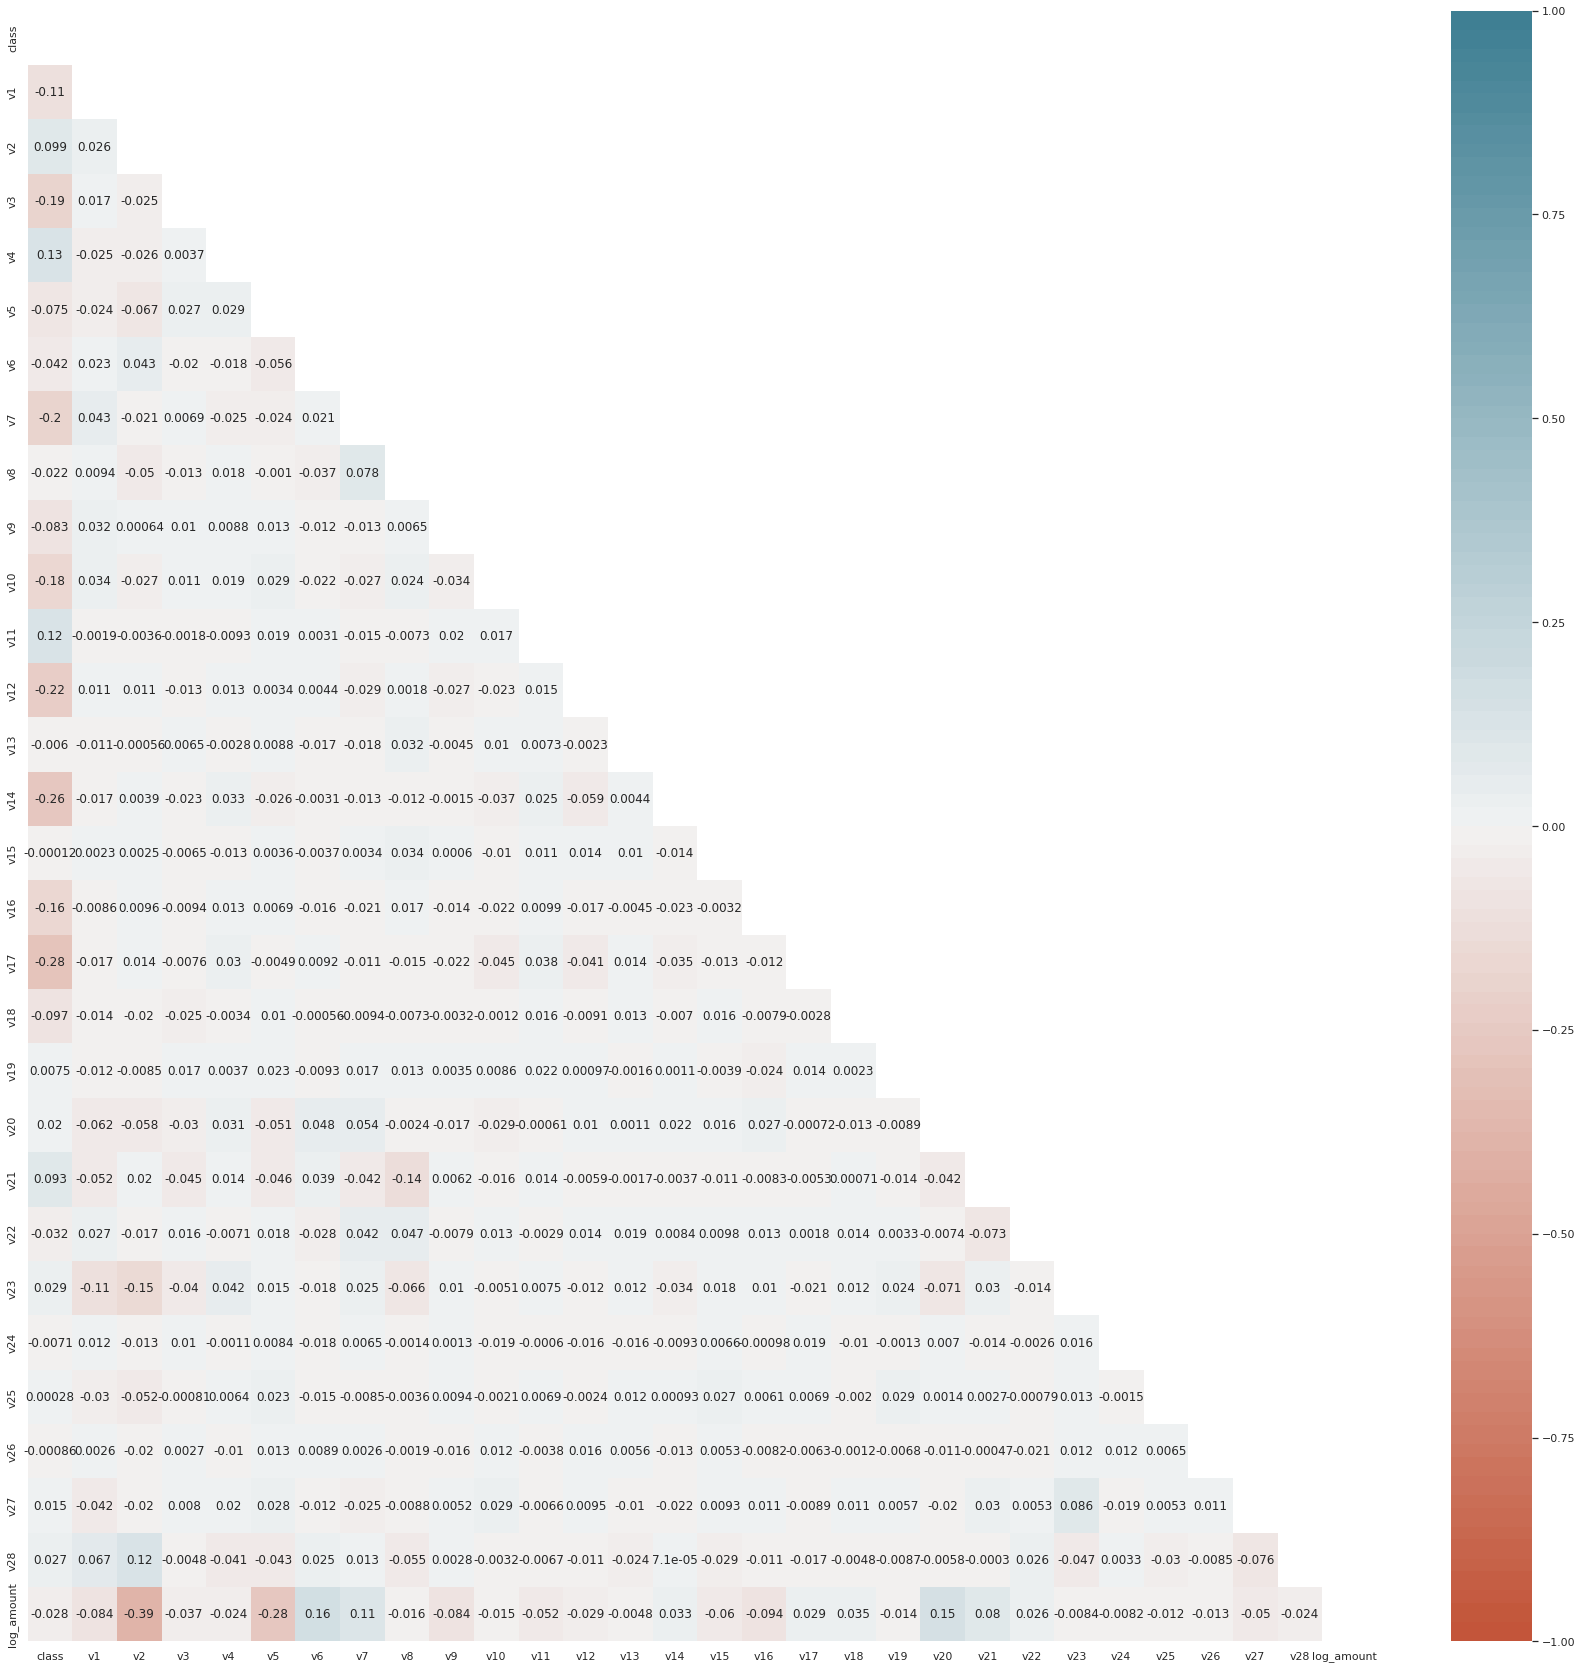

In [ ]:
# Feature 별 상관계수
plt.figure(figsize=(30, 30))

matrix = np.triu(data.corr())
sns.heatmap(data.corr(),
            annot=True, fmt='.2g',
            mask=matrix,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=100));

<a id="pair_plots"></a>

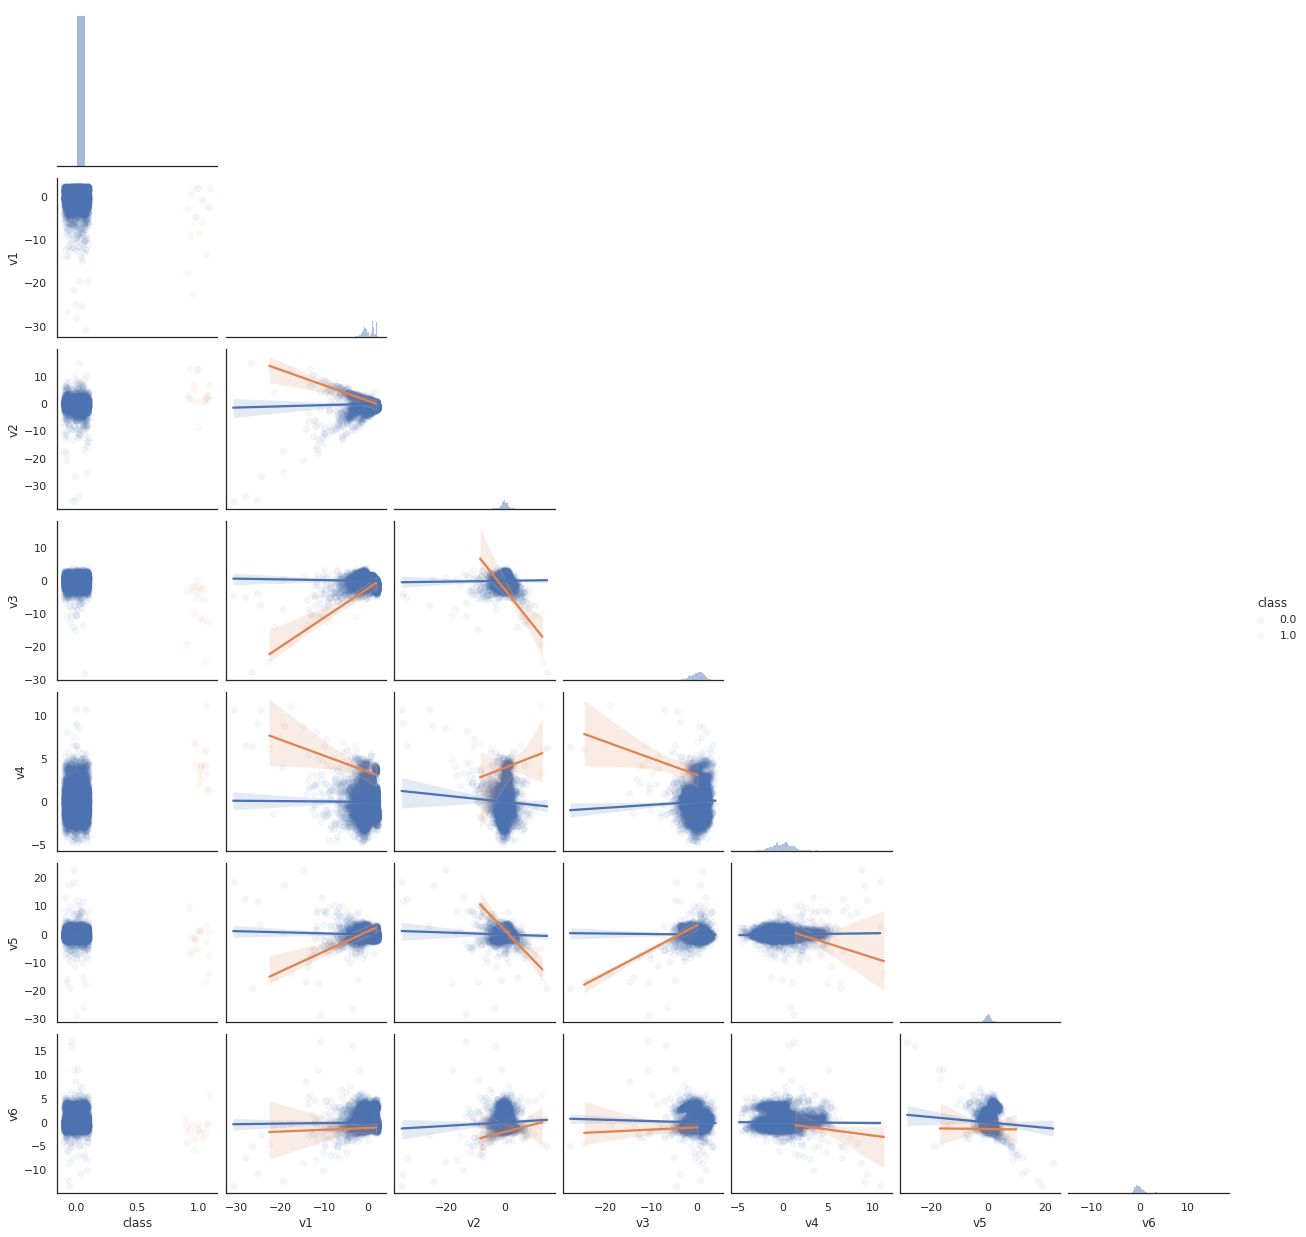

In [ ]:
sns.pairplot(data.iloc[:, :7],
             vars=list(data.columns)[:7],
             kind='reg',
             diag_kind='hist',
             hue='class',
             # markers=['o', 's'],
             corner=True,
             plot_kws={'scatter_kws': {'alpha': 0.05},
                       'x_jitter': 0.1, 'y_jitter': 0.1});

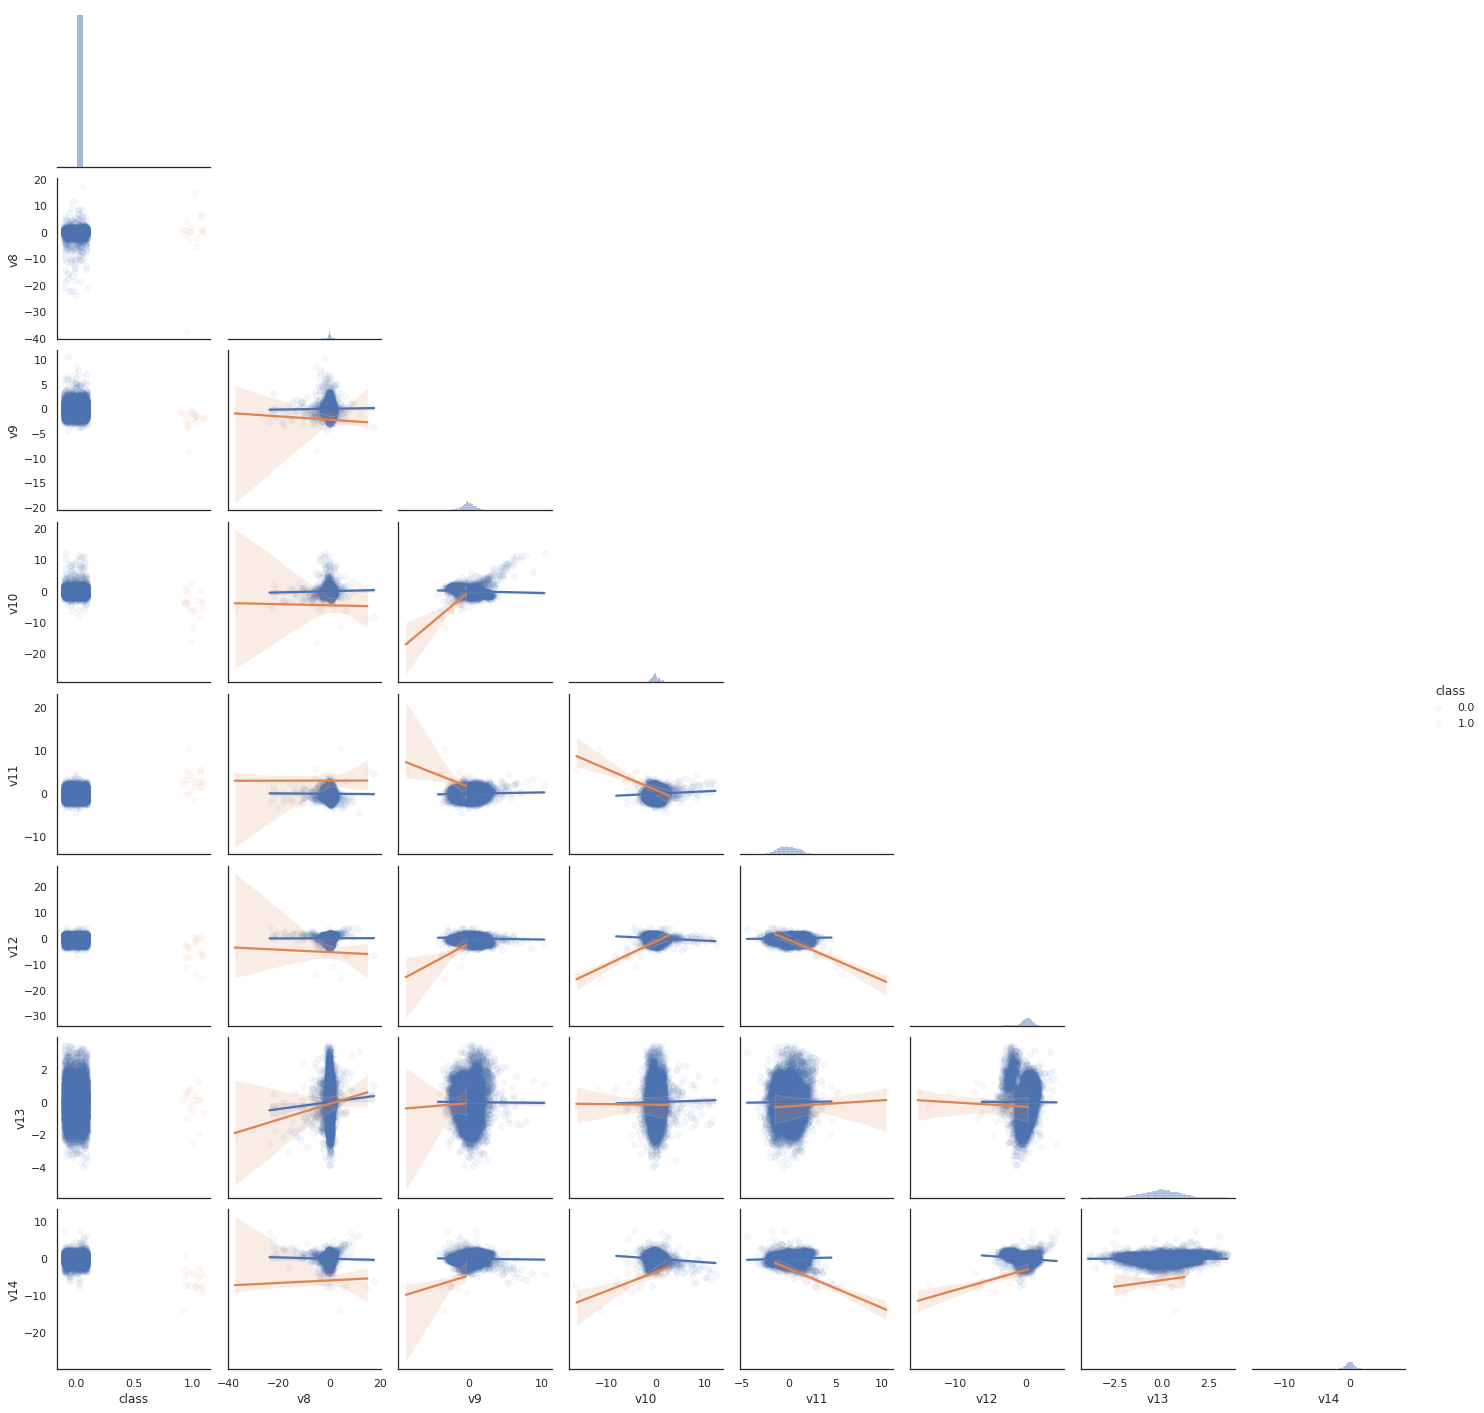

In [ ]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 8:15]], axis=1),
             vars=[list(data.columns)[0]]+list(data.columns)[8:15],
             kind='reg',
             diag_kind='hist',
             hue='class',
             corner=True,
             plot_kws={'scatter_kws': {'alpha': 0.05},
                       'x_jitter': 0.1, 'y_jitter': 0.1});

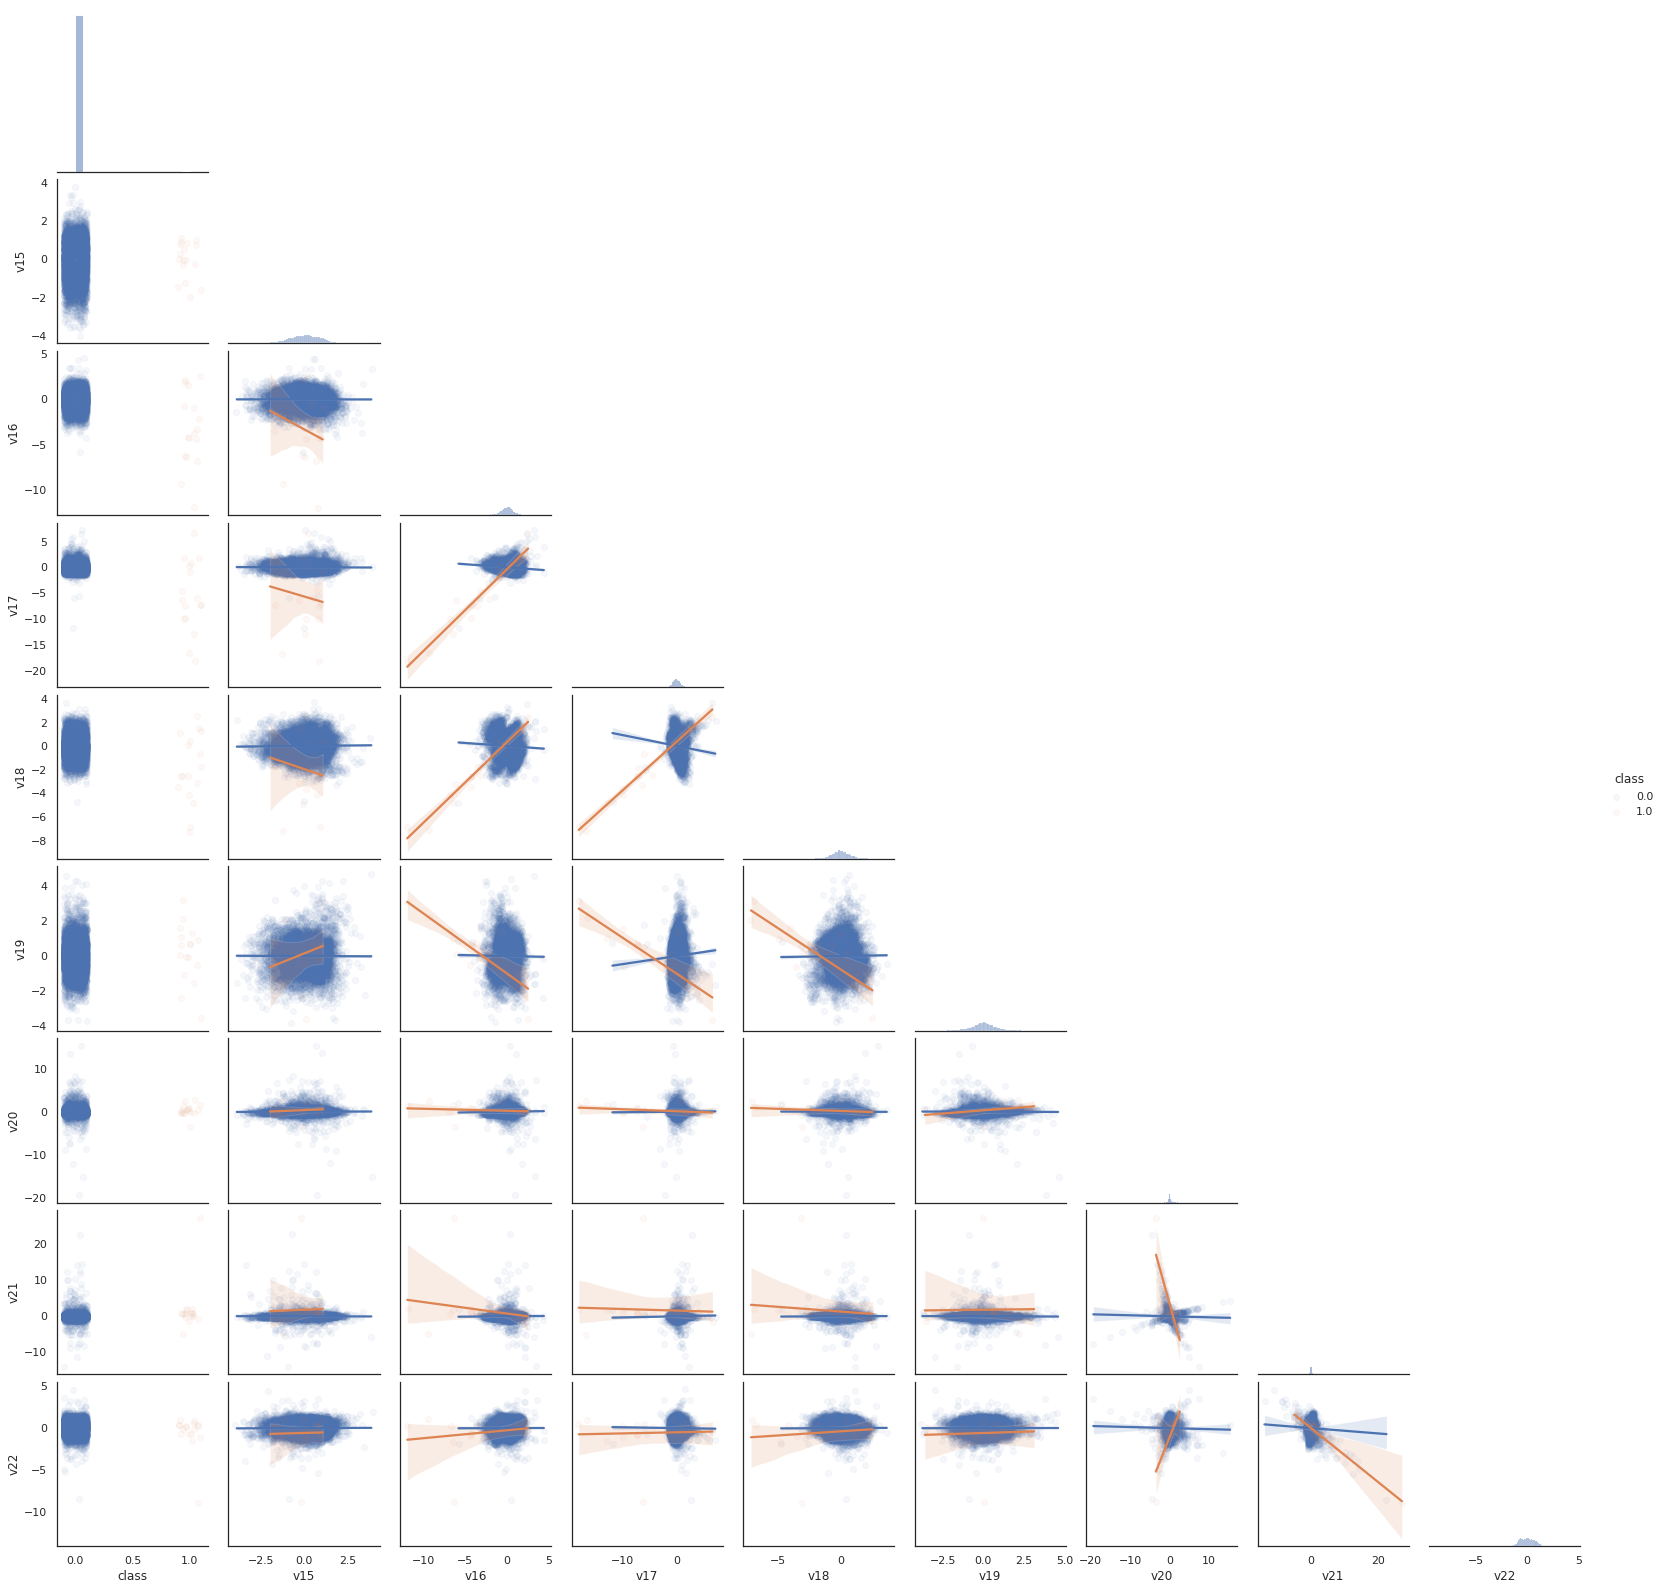

In [ ]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 15:23]], axis=1),
             vars=[list(data.columns)[0]]+list(data.columns)[15:23],
             kind='reg',
             diag_kind='hist',
             hue='class',
             corner=True,
             plot_kws={'scatter_kws': {'alpha': 0.05},
                       'x_jitter': 0.1, 'y_jitter': 0.1});

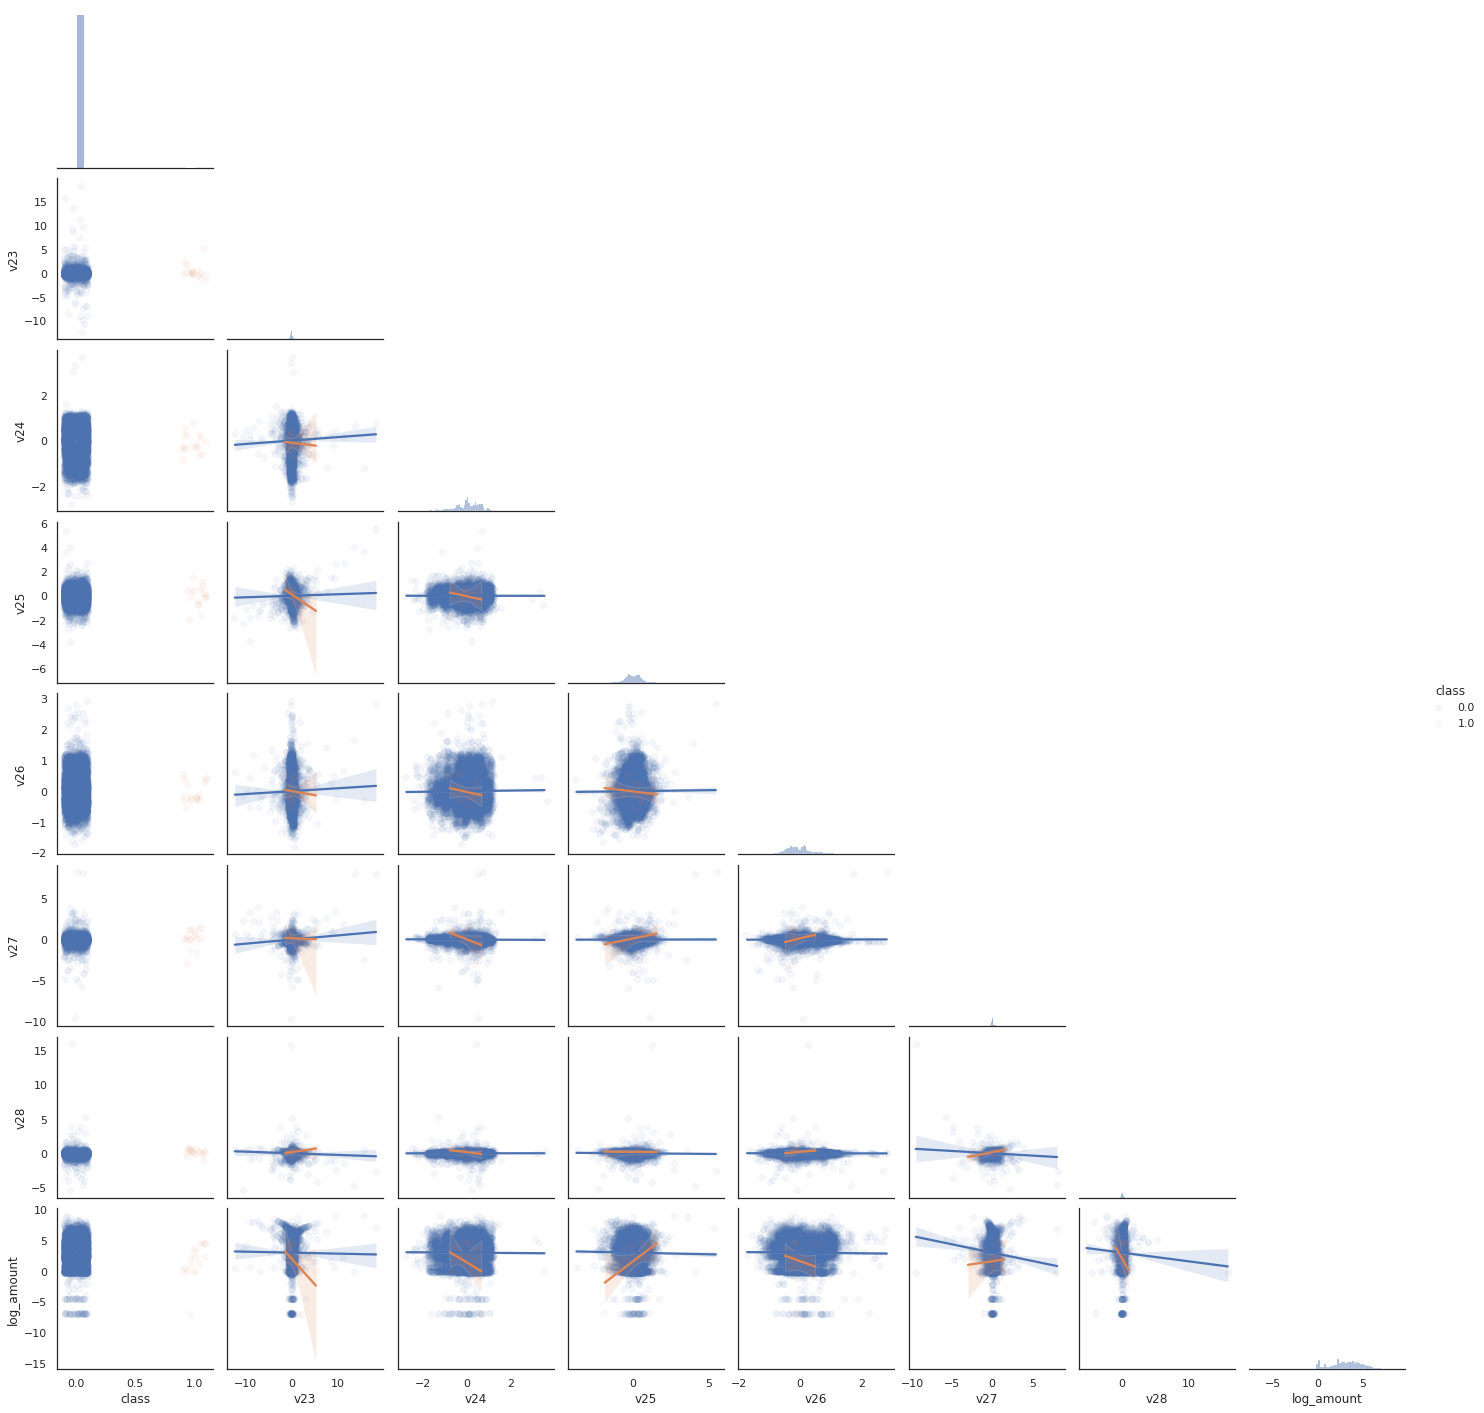

In [ ]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 23:]], axis=1),
             vars=[list(data.columns)[0]]+list(data.columns)[23:],
             kind='reg',
             diag_kind='hist',
             hue='class',
             corner=True,
             plot_kws={'scatter_kws': {'alpha': 0.05},
                       'x_jitter': 0.1, 'y_jitter': 0.1});

<a id="standardize_predictors"></a>

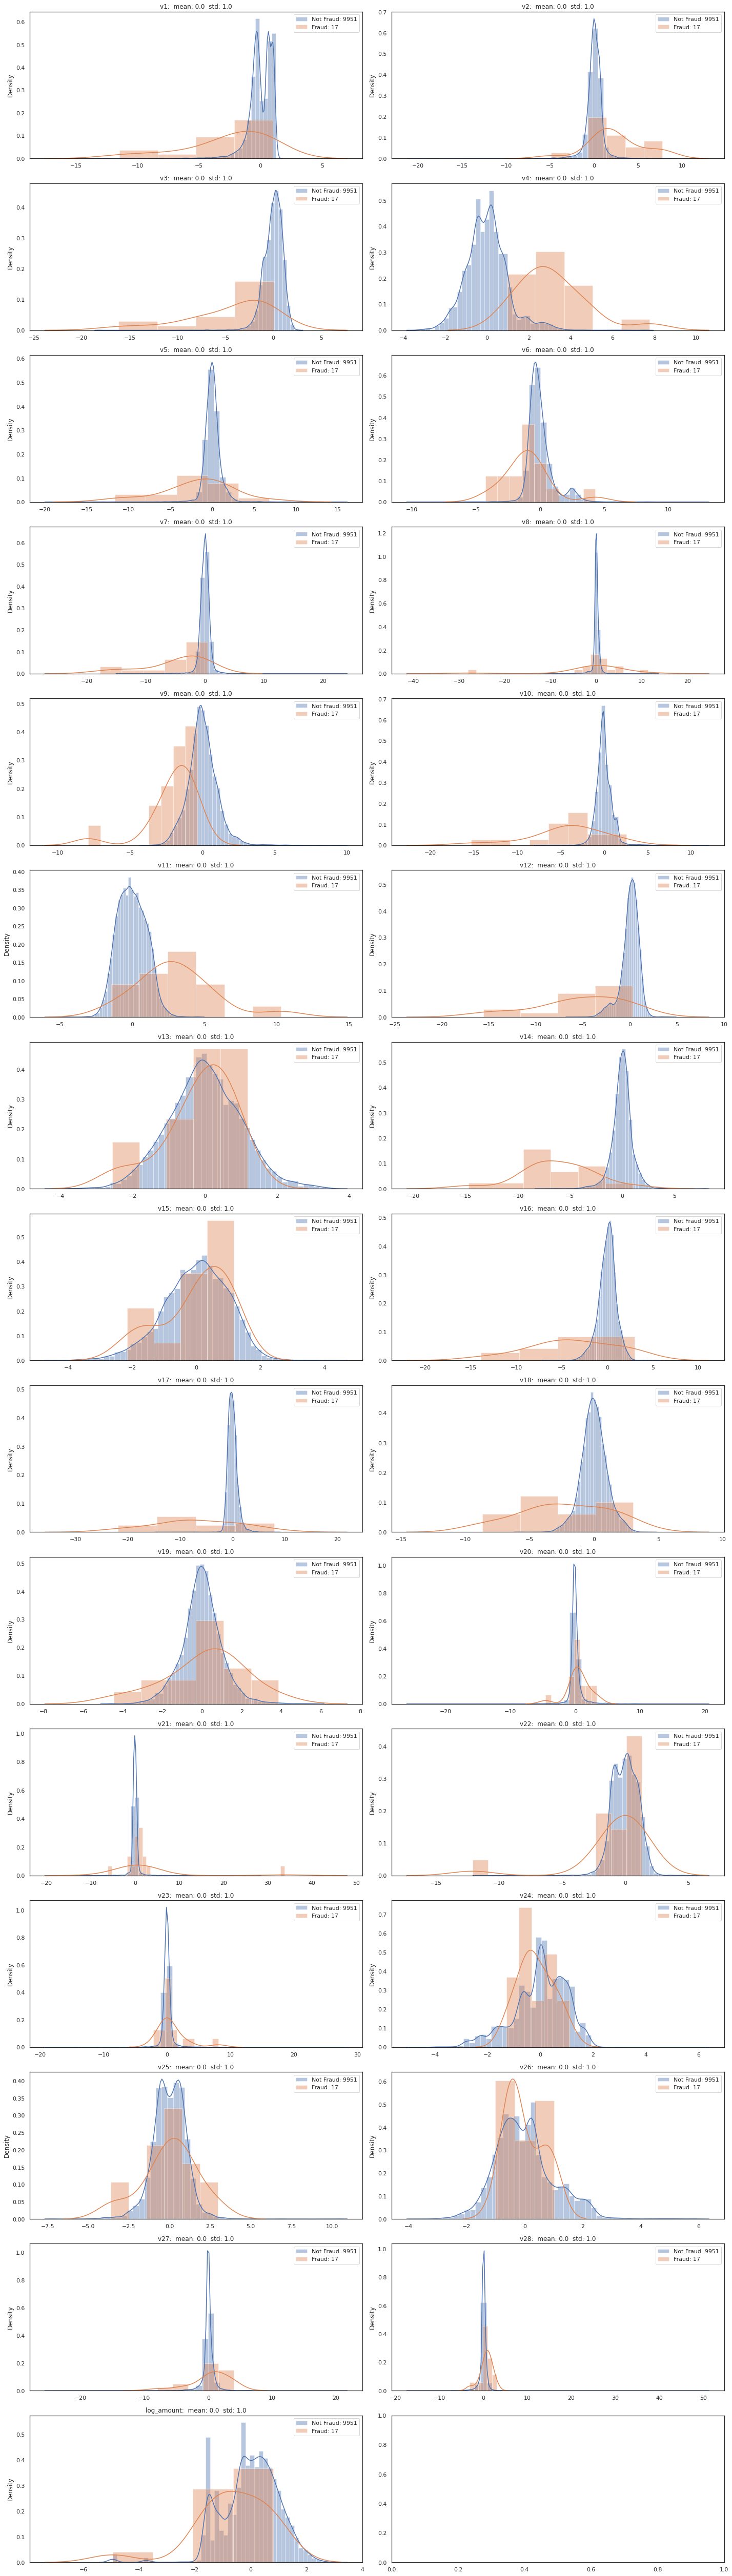

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train_std.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format('Not Fraud', len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format('Fraud',     len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(data.columns)[i+1], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

# **🥈Session 2 - 「Modeling」**
---

## 2-1. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_clf = LogisticRegressionCV(cv=3,
                              penalty='elasticnet', solver='saga',
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)),
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float),
                              max_iter=1000,
                              random_state=0,
                              n_jobs=3)

start = time()
lr_clf.fit(X_train_std, y_train)
lr_duration = time() - start

print("LogisticRegressionCV took {:.2f} seconds for {} cv iterations with {} parameter settings.".format(lr_duration,
                                                                                                         lr_clf.n_iter_.shape[1],
                                                                                                         lr_clf.n_iter_.shape[2] * lr_clf.n_iter_.shape[3]))



LogisticRegressionCV took 182.15 seconds for 3 cv iterations with 24 parameter settings.
Optimal regularization strength: 1.0  Optimal L1 Ratio: 0.0
Accuracy (train): 1.00
Accuracy  (test): 1.00


In [ ]:
print('Optimal regularization strength: {}  Optimal L1 Ratio: {}'.format(lr_clf.C_[0], lr_clf.l1_ratio_[0]))
print('Accuracy (train): {:.4}'.format(lr_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.4f}'.format(lr_clf.score(X_test_std,  y_test)))

Optimal regularization strength: 1.0  Optimal L1 Ratio: 0.0
Accuracy (train): 0.9995
Accuracy  (test): 0.9993


In [ ]:
lr_params = dict(zip(list(data.columns)[1:], list(lr_clf.coef_[0])),
                 intercept=lr_clf.intercept_[0])
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}

{'v1': 0.89,
 'v4': 0.75,
 'v5': 0.51,
 'v28': 0.39,
 'v27': 0.31,
 'v24': 0.22,
 'v22': 0.21,
 'v23': 0.11,
 'v13': 0.1,
 'v20': 0.08,
 'v11': 0.05,
 'v21': 0.03,
 'v16': 0.0,
 'v26': -0.01,
 'v18': -0.04,
 'v2': -0.1,
 'v3': -0.1,
 'v10': -0.18,
 'v25': -0.19,
 'v7': -0.31,
 'v6': -0.31,
 'v12': -0.36,
 'log_amount': -0.38,
 'v8': -0.39,
 'v15': -0.42,
 'v19': -0.45,
 'v9': -0.5,
 'v17': -0.56,
 'v14': -1.06,
 'intercept': -9.76}

In [ ]:
predicted_class_labels = lr_clf.predict(X_test_std)
predicted_class_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)
    s.name = model_name
    return s

def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc     = accuracy_score(y_true, y_pred)
    pre     = precision_score(y_true, y_pred)
    rec     = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    ck      = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s

In [ ]:
lr_cv = get_cross_val(lr_clf, X_test_std, y_test, 'logistic regression')
lr_cv.round(2)

mean                  0.53
standard deviation    0.28
p025                  0.05
p975                  0.79
Name: logistic regression, dtype: float64

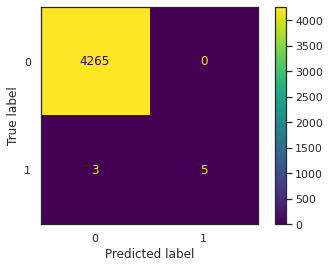

In [ ]:
y_pred = lr_clf.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)
disp.plot()

In [ ]:
y_pred = lr_clf.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'logistic_regression')
lr_metrics

accuracy                                                 0.999298
precision                                                     1.0
recall                                                      0.625
roc_auc                                                    0.8125
f1_score                                                 0.769231
cohen_kappa                                              0.768898
precision_both                          [0.9992970946579194, 1.0]
recall_both                                          [1.0, 0.625]
fbeta_both               [0.9996484237665534, 0.7692307692307693]
support_both                                            [4265, 8]
time_to_fit (seconds)                                  182.153385
Name: logistic_regression, dtype: object

## 2-2. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1,16)}

knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, param_grid=param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_duration = time() - start

print("GridSearchCV of KNN took {:.2f} seconds for {} candidate parameter settings.".format(knn_duration,
                                                                                            len(gs_knn.cv_results_['params'])))
# report(gs_knn.cv_results_)
print('Optimal weights: {}  Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('Accuracy (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_knn.score(X_test_std,  y_test)))

GridSearchCV of KNN took 29.76 seconds for 30 candidate parameter settings.
Optimal weights: distance  Optimal n_neighbors: 7
Accuracy (train): 1.00
Accuracy  (test): 1.00


In [ ]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}


In [ ]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

mean                  0.73
standard deviation    0.39
p025                  0.07
p975                  1.00
Name: k-nearest neighbors, dtype: float64

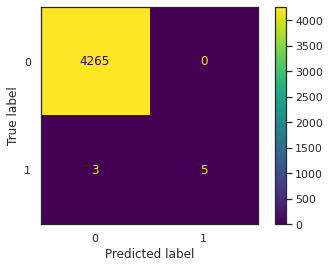

In [ ]:
y_pred = gs_knn.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_knn.classes_)
disp.plot()

In [ ]:
y_pred = gs_knn.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics

accuracy                                                 0.999298
precision                                                     1.0
recall                                                      0.625
roc_auc                                                    0.8125
f1_score                                                 0.769231
cohen_kappa                                              0.768898
precision_both                          [0.9992970946579194, 1.0]
recall_both                                          [1.0, 0.625]
fbeta_both               [0.9996484237665534, 0.7692307692307693]
support_both                                            [4265, 8]
time_to_fit (seconds)                                   29.764022
Name: k-nearest neighbors, dtype: object

## 2-3. Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'],
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda.fit(X_train_std, y_train)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration,
                                                                                            len(gs_lda.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_lda.score(X_test_std,  y_test)))

GridSearchCV of LDA took 1.91 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: None  Optimal n_components: 1
Accuracy (train): 1.00
Accuracy  (test): 1.00


In [ ]:
lda_cv = get_cross_val(lda_clf, X_test_std, y_test, 'linear discriminanat analysis')
lda_cv.round(2)

mean                  0.76
standard deviation    0.13
p025                  0.67
p975                  0.98
Name: linear discriminanat analysis, dtype: float64

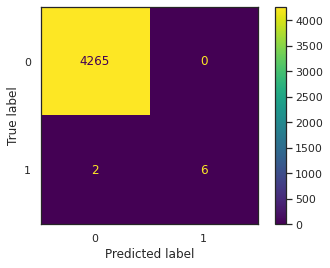

In [ ]:
y_pred = gs_lda.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_lda.classes_)
disp.plot()

In [ ]:
y_pred = gs_lda.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.75      0.86         8

    accuracy                           1.00      4273
   macro avg       1.00      0.88      0.93      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
lda_metrics = calculate_metrics(y_test, y_pred, lda_duration, 'linear discriminant analysis')
lda_metrics

accuracy                                                 0.999532
precision                                                     1.0
recall                                                       0.75
roc_auc                                                     0.875
f1_score                                                 0.857143
cohen_kappa                                              0.856913
precision_both                           [0.999531286618233, 1.0]
recall_both                                           [1.0, 0.75]
fbeta_both               [0.9997655883731834, 0.8571428571428571]
support_both                                            [4265, 8]
time_to_fit (seconds)                                    1.909573
Name: linear discriminant analysis, dtype: object

## 2-4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': np.power(10, np.arange(0, 3, dtype=float)),
              'kernel': ['linear', 'sigmoid', 'rbf'],
              'gamma': ['auto', 'scale']}

svc_clf = SVC(random_state=0)

gs_svc = GridSearchCV(svc_clf, param_grid=param_grid)

start = time()
gs_svc.fit(X_train_std, y_train)
svc_duration = time() - start

print("GridSearchCV of SVC took {:.2f} seconds for {} candidate parameter settings.".format(svc_duration,
                                                                                            len(gs_svc.cv_results_['params'])))
# report(gs_svc.cv_results_)
print('Optimal C: {}  Optimal kernel: {}  Optimal gamma: {}'.format(gs_svc.best_params_['C'], gs_svc.best_params_['kernel'], gs_svc.best_params_['gamma']))
print('Accuracy (train): {:.2f}'.format(gs_svc.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_svc.score(X_test_std,  y_test)))

GridSearchCV of SVC took 8.71 seconds for 18 candidate parameter settings.
Optimal C: 1.0  Optimal kernel: sigmoid  Optimal gamma: scale
Accuracy (train): 1.00
Accuracy  (test): 1.00


In [ ]:
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'support vector machines')
svc_cv.round(2)

mean                  0.67
standard deviation    0.37
p025                  0.07
p975                  1.00
Name: support vector machines, dtype: float64

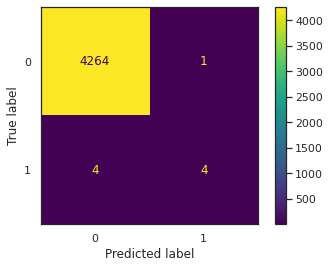

In [ ]:
y_pred = gs_svc.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_svc.classes_)
disp.plot()

In [ ]:
y_pred = gs_svc.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       0.80      0.50      0.62         8

    accuracy                           1.00      4273
   macro avg       0.90      0.75      0.81      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
svc_metrics = calculate_metrics(y_test, y_pred, svc_duration, 'support vector machines')
svc_metrics

accuracy                                                  0.99883
precision                                                     0.8
recall                                                        0.5
roc_auc                                                  0.749883
f1_score                                                 0.615385
cohen_kappa                                               0.61483
precision_both                          [0.9990627928772259, 0.8]
recall_both                             [0.9997655334114889, 0.5]
fbeta_both               [0.9994140396109223, 0.6153846153846154]
support_both                                            [4265, 8]
time_to_fit (seconds)                                    8.710997
Name: support vector machines, dtype: object

## 2-5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(100, 800, 200, dtype=int),
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth': [None, 3, 5]}

rf_clf = RandomForestClassifier(oob_score=True, random_state=0)

gs_rf = GridSearchCV(rf_clf, param_grid=param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_duration = time() - start

print("GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings.".format(rf_duration,
                                                                                           len(gs_rf.cv_results_['params'])))
# report(gs_rf.cv_results_)
print('Optimal n_estimators: {}  Optimal max_features: {}  Optimal max_depth: {}'.format(gs_rf.best_params_['n_estimators'],
                                                                                         gs_rf.best_params_['max_features'],
                                                                                         gs_rf.best_params_['max_depth']))

GridSearchCV of RF took 2820.40 seconds for 36 candidate parameter settings.
Optimal n_estimators: 100  Optimal max_features: sqrt  Optimal max_depth: None


In [ ]:
print('Accuracy (train): {:.4f}'.format(gs_rf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.4f}'.format(gs_rf.score(X_test_std,  y_test)))

Accuracy (train): 1.0000
Accuracy  (test): 0.9993


In [ ]:
clf_rf = RandomForestClassifier(n_estimators=gs_rf.best_params_['n_estimators'],
                                max_features=gs_rf.best_params_['max_features'],
                                max_depth=gs_rf.best_params_['max_depth'],
                                oob_score=True,
                                random_state=0)

rf_cv = get_cross_val(clf_rf, X_test_std, y_test, 'random forest')
rf_cv.round(2)

mean                  0.47
standard deviation    0.40
p025                  0.00
p975                  0.97
Name: random forest, dtype: float64

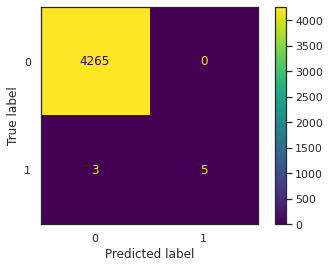

In [ ]:
y_pred = gs_rf.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_rf.classes_)
disp.plot()

In [ ]:
y_pred = gs_rf.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
rf_metrics = calculate_metrics(y_test, y_pred, rf_duration, 'random forest')
rf_metrics

accuracy                                                 0.999298
precision                                                     1.0
recall                                                      0.625
roc_auc                                                    0.8125
f1_score                                                 0.769231
cohen_kappa                                              0.768898
precision_both                          [0.9992970946579194, 1.0]
recall_both                                          [1.0, 0.625]
fbeta_both               [0.9996484237665534, 0.7692307692307693]
support_both                                            [4265, 8]
time_to_fit (seconds)                                 2820.403772
Name: random forest, dtype: object

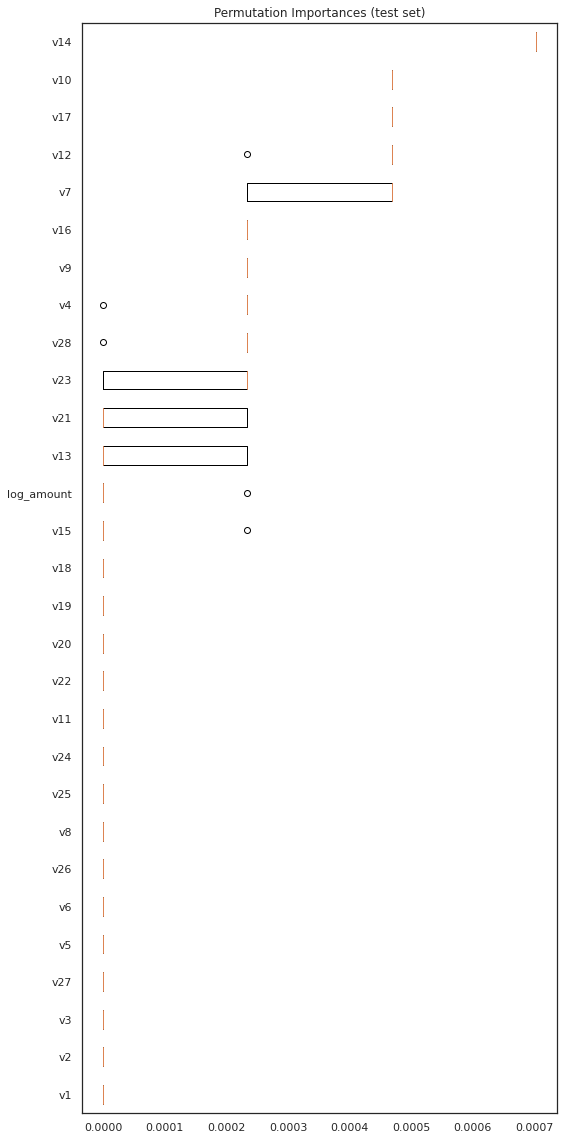

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns=list(data.columns)[1:])

f, ax = plt.subplots(figsize=(8,16))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.tight_layout();

## 2-6. Compare Models

In [ ]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, rf_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 4) for val in elem]).sort_values(by='f1_score', ascending=False)

,accuracy,precision,recall,roc_auc,f1_score,cohen_kappa,precision_both,recall_both,fbeta_both,support_both,time_to_fit (seconds)
linear discriminant analysis,0.9995,1.0,0.750,0.8750,0.8571,0.8569,"[0.9995, 1.0]","[1.0, 0.75]","[0.9998, 0.8571]","[4265, 8]",1.9096
logistic_regression,0.9993,1.0,0.625,0.8125,0.7692,0.7689,"[0.9993, 1.0]","[1.0, 0.625]","[0.9996, 0.7692]","[4265, 8]",182.1534
k-nearest neighbors,0.9993,1.0,0.625,0.8125,0.7692,0.7689,"[0.9993, 1.0]","[1.0, 0.625]","[0.9996, 0.7692]","[4265, 8]",29.7640
random forest,0.9993,1.0,0.625,0.8125,0.7692,0.7689,"[0.9993, 1.0]","[1.0, 0.625]","[0.9996, 0.7692]","[4265, 8]",2820.4038
support vector machines,0.9988,0.8,0.500,0.7499,0.6154,0.6148,"[0.9991, 0.8]","[0.9998, 0.5]","[0.9994, 0.6154]","[4265, 8]",8.7110


In [ ]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, rf_cv], axis=1).T

cross_vals = cross_vals.round(4).sort_values(by='mean', ascending=False)
cross_vals

,mean,standard deviation,p025,p975
linear discriminanat analysis,0.7600,0.1306,0.6667,0.9800
k-nearest neighbors,0.7333,0.3887,0.0667,1.0000
support vector machines,0.6667,0.3651,0.0667,1.0000
logistic regression,0.5267,0.2800,0.0500,0.7867
random forest,0.4667,0.4000,0.0000,0.9667


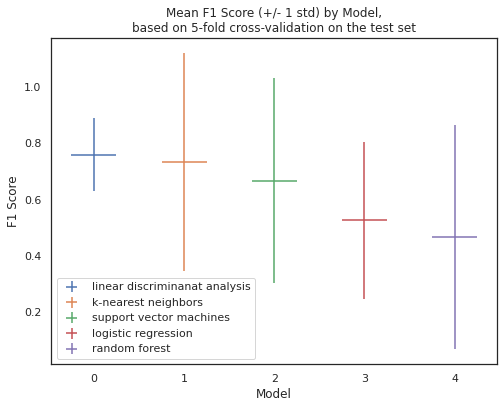

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

#plt.ylim(0.7,1)
plt.title('Mean F1 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc='lower left');

# **🥇Session 3 - 「Feature Engineering」**
---

## 3-3. Oversampling (Numpy)

In [ ]:
bool_y_train = y_train != 0

pos_features = X_train_std[bool_y_train]
neg_features = X_train_std[~bool_y_train]

pos_labels = y_train[bool_y_train]
neg_labels = y_train[~bool_y_train]

pos_features.shape, neg_features.shape

((17, 29), (9951, 29))

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels   = pos_labels[choices]

res_pos_features.shape, res_pos_labels.shape

((9951, 29), (9951,))

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels   = np.concatenate([res_pos_labels,   neg_labels],   axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)

resampled_features = resampled_features[order]
resampled_labels   = resampled_labels[order]

resampled_features.shape, resampled_labels.shape

((19902, 29), (19902,))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'],
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda_resamp = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda_resamp.fit(resampled_features, resampled_labels)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration,
                                                                                            len(gs_lda_resamp.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda_resamp.best_params_['solver'],
                                                                                   gs_lda_resamp.best_params_['shrinkage'],
                                                                                   gs_lda_resamp.best_params_['n_components']))
print('Accuracy (train): {:.4f}'.format(gs_lda_resamp.score(resampled_features, resampled_labels)))
print('Accuracy  (test): {:.4f}'.format(gs_lda_resamp.score(X_test_std,  y_test)))

GridSearchCV of LDA took 5.18 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: auto  Optimal n_components: 1
Accuracy (train): 0.9895
Accuracy  (test): 0.9799


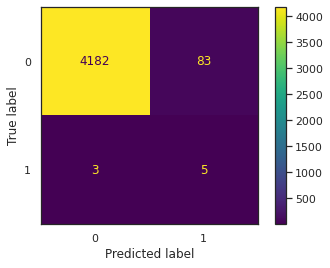

In [ ]:
y_pred = gs_lda_resamp.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_lda_resamp.classes_)
disp.plot()

In [ ]:
calculate_metrics(y_test, y_pred, knn_duration, 'oversampling numpy')

accuracy                                                  0.978938
precision                                                 0.054348
recall                                                       0.625
roc_auc                                                   0.802301
f1_score                                                       0.1
cohen_kappa                                               0.096889
precision_both            [0.999282468309017, 0.05434782608695652]
recall_both                            [0.9796014067995311, 0.625]
fbeta_both               [0.9893440681979636, 0.09999999999999999]
support_both                                             [4265, 8]
time_to_fit (seconds)                                    29.764022
Name: oversampling numpy, dtype: object

## 3-4. Oversampling (imbalance-learn)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train_std, y_train)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 9951), (1, 9951)]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'],
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda_resamp = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda_resamp.fit(resampled_features, resampled_labels)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration,
                                                                                            len(gs_lda_resamp.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda_resamp.best_params_['solver'],
                                                                                   gs_lda_resamp.best_params_['shrinkage'],
                                                                                   gs_lda_resamp.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda_resamp.score(resampled_features, resampled_labels)))
print('Accuracy  (test): {:.2f}'.format(gs_lda_resamp.score(X_test_std,  y_test)))

GridSearchCV of LDA took 3.28 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: None  Optimal n_components: 1
Accuracy (train): 0.99
Accuracy  (test): 0.98


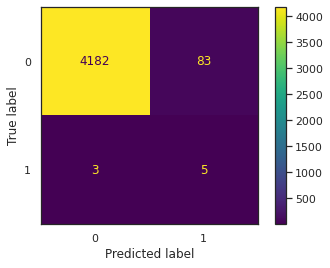

In [ ]:
y_pred = gs_lda_resamp.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_lda_resamp.classes_)
disp.plot()

In [ ]:
calculate_metrics(y_test, y_pred, knn_duration, 'oversampling scikit-learn')

accuracy                                                  0.978938
precision                                                 0.054348
recall                                                       0.625
roc_auc                                                   0.802301
f1_score                                                       0.1
cohen_kappa                                               0.096889
precision_both            [0.999282468309017, 0.05434782608695652]
recall_both                            [0.9796014067995311, 0.625]
fbeta_both               [0.9893440681979636, 0.09999999999999999]
support_both                                             [4265, 8]
time_to_fit (seconds)                                    29.764022
Name: oversampling scikit-learn, dtype: object

# Lesson & learned

## Imbalanced problem.. undersampling, oversampling


### 1. 현업의 데이터는 대부분의 경우(거의 모든 경우) 분석하고자 하는 클래스의 비율이 Imbalance 하기 때문에, 어떻게 Imbalance를 해결할지에 대한 고민이 필요하다.
### 2. 가장 먼저 시도할 수 있는 방법은 undersampling 방법이다. oversampling은 많은 방법들이 시도 되지만, 결국 분포를 추정해야 되고 Interpolation과 같이 분포의 가운데 어딘가를 추정해야 하기 때문에 불확실성이 undersampling 방법보다는 높다.
### 3. undersampling 방법을 통해 데이터의 모수를 작게 만들고 학습을 통해 클래스의 경계를 학습해보고 결과를 살펴본다.
### 4. 이럼에도 불구하고 결과가 맞지 않거나, 결과에 대한 설명이 어렵다면 oversampling을 통해 데이터를 1:1 비율로 만들어서 특성을 살펴보는 것도 하나의 방법이다. (하지만, 이 방법은 경계는 뚜렷하게 만들어주지만 샘플의 개수에 의한 가중치가 실제 분포와 달라지기 때문에 추천하지 않는다..)

#### 이번 챕터에서는 신용카드의 이상거래를 탐지할 수 있는 모델을 만들어보는 실습을 진행했다. 데이터의 모수는 적당한 수준이었으나, 클래스의 비율이 Imbalance하여 처음부터 샘플링 기법 적용을 통해 문제 해결에 접근했다.
#### 이상거래와 같이 매우 민감한 모델의 경우에는 recall이 매우 높아야 한다. precision도 물론 중요하지만, 굳이 가중치를 더 보자면 recall은 항상 1.0이 나와야 하다는 뜻이다.
#### oversampling을 통해 오히려 오탐이 더 늘어나는 것을 확인했다. 이는 앞서 말했던 1:1 비율로 맞추는 것을 추천하지 않는 이유에서 나오는 결과이다. 이러한 결과를 보고, over/under sampling의 특성을 이해하는 시간을 가졌다.
